# Problem
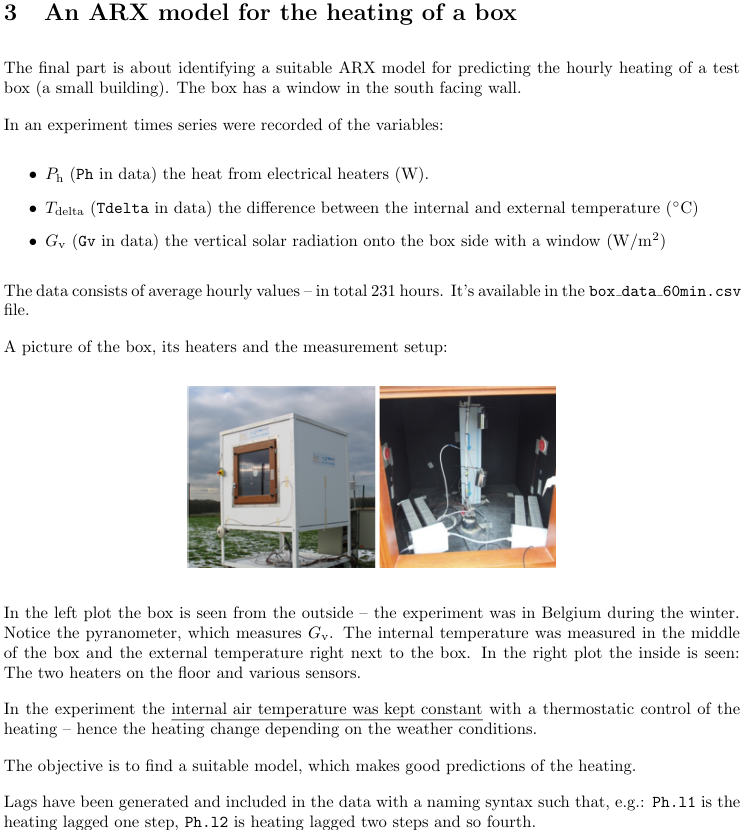

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_ccf
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller
from stationarizer import simple_auto_stationarize
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg as ARX

print('check')



check


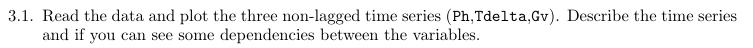

   thour                tdate  Ph     Tdelta        Gv  Ph.l0  Ph.l1  Ph.l2  \
0     19  2013-01-30 02:00:00  56  13.253583 -0.498643     56     55     57   
1     20  2013-01-30 03:00:00  54  13.181458 -1.127035     54     56     55   

   Ph.l3  Ph.l4  ...     Gv.l1     Gv.l2     Gv.l3     Gv.l4     Gv.l5  \
0     57     58  ... -0.499338 -0.417959 -0.221011 -0.453375 -0.747238   
1     57     57  ... -0.498643 -0.499338 -0.417959 -0.221011 -0.453375   

      Gv.l6     Gv.l7     Gv.l8     Gv.l9     Gv.l10  
0 -0.669267 -0.451776 -0.142700  8.262339  20.475484  
1 -0.747238 -0.669267 -0.451776 -0.142700   8.262339  

[2 rows x 38 columns]

~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   thour       231 non-null    int64  
 1   tdate       231 non-null    object 
 2   Ph          231 non-null    int64  
 3   Tdelta      231 non-null    float

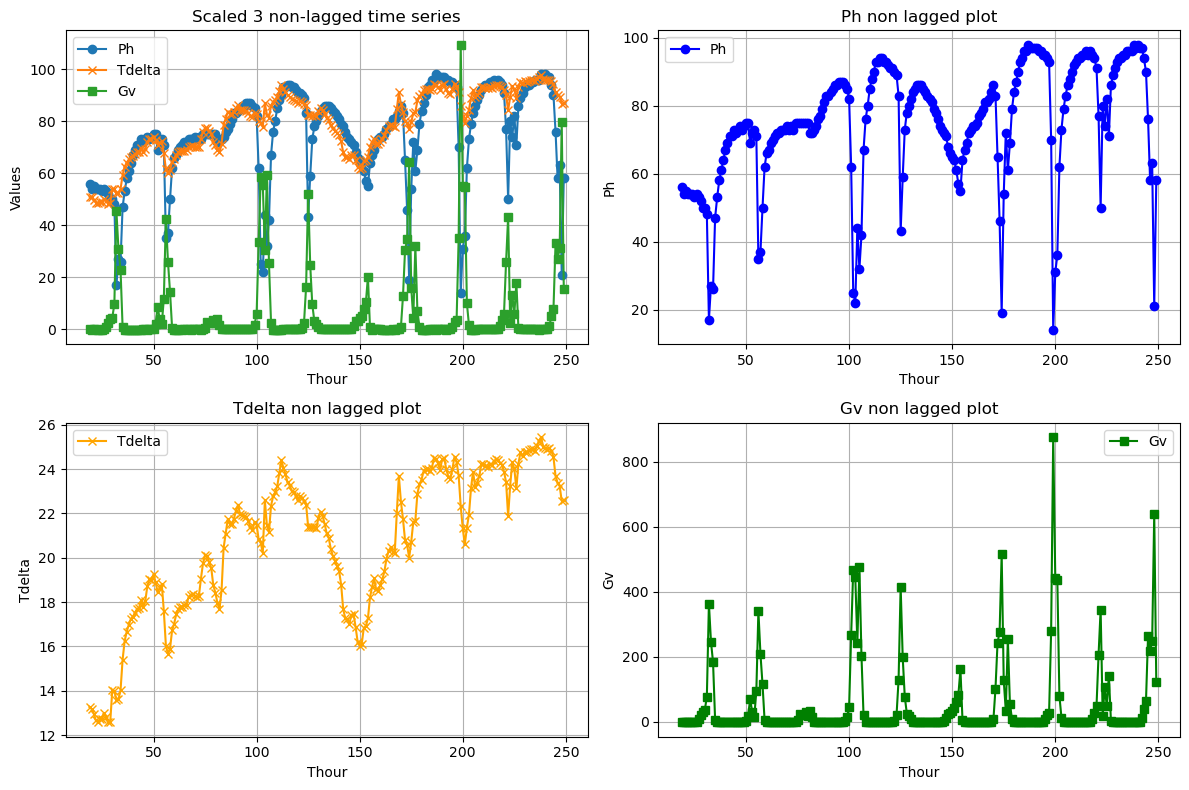

In [2]:

# read data
df=pd.read_csv('box_data_60min.csv')

# data info
print(df.head(2))
print('\n~')
print(df.info())
print('\n~')

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

#plt.figure(figsize=(8, 5))
axes[0][0].plot(df['thour'], df['Ph'], label='Ph', marker='o')
axes[0][0].plot(df['thour'], df['Tdelta']*(100/26), label='Tdelta', marker='x')
axes[0][0].plot(df['thour'], df['Gv']*(100/800), label='Gv', marker='s')
axes[0][0].set_xlabel('Thour')
axes[0][0].set_ylabel('Values')
axes[0][0].set_title('Scaled 3 non-lagged time series')
axes[0][0].legend()
axes[0][0].grid()

# Plotting the first subplot
axes[0][1].plot(df['thour'], df['Ph'], label='Ph', marker='o', color='blue')
axes[0][1].set_title('Ph non lagged plot')
axes[0][1].set_xlabel('Thour')
axes[0][1].set_ylabel('Ph')
axes[0][1].grid()
axes[0][1].legend()

# Plotting the second subplot 
axes[1][0].plot(df['thour'], df['Tdelta'], label='Tdelta', marker='x', color='orange')
axes[1][0].set_title('Tdelta non lagged plot')
axes[1][0].set_xlabel('Thour')
axes[1][0].set_ylabel('Tdelta')
axes[1][0].grid()
axes[1][0].legend()

# Plotting the third subplot 
axes[1][1].plot(df['thour'], df['Gv'], label='Gv', marker='s', color='green')
axes[1][1].set_title('Gv non lagged plot')
axes[1][1].set_xlabel('Thour')
axes[1][1].set_ylabel('Gv')
axes[1][1].grid()
axes[1][1].legend()

# Adjusting layout for better visualization
plt.tight_layout()
plt.show()


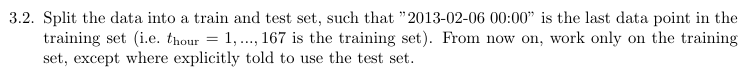

In [3]:
# split data
print('initial data dimensions: ',np.shape(df))

split_row= df.index[df['tdate']=="2013-02-06 00:00:00"].tolist()[0]+1
print('Spliting element(must be in train): ',split_row)

# Split the DataFrame
df_train = df.iloc[:split_row]  # Rows before the specified index
df_test = df.iloc[split_row:]  # Rows from the specified index onwards

# Printing the results
print("\ntraining data dimensions:")
print(np.shape(df_train))

print("\ntesting data dimensions:")
print(np.shape(df_test))

print(df_test[['Ph','Tdelta','Gv']].head())



initial data dimensions:  (231, 38)
Spliting element(must be in train):  167

training data dimensions:
(167, 38)

testing data dimensions:
(64, 38)
     Ph     Tdelta        Gv
167  96  24.496750 -0.626292
168  98  24.449792 -0.927245
169  97  24.255542 -0.657429
170  97  23.972292 -0.247884
171  97  24.439875 -0.459545


In [4]:
c='Ph'

a=0
for i in range(len(df_train[c])):
    #print(df_train[c][i],df_train[c+'.l0'][i])
    if df_train[c][i]!=df_train[c+'.l0'][i]: 
        print(df_train[c][i],df_train[c+'.l0'][i])
        #print('EDWWW ',i+2)
        a+=1
print(a)

# DO NOT USE .l0 of any parameter. Instead use the first 3 columns with "simple names". Start from .l1,.l2 etc.

37 54
1


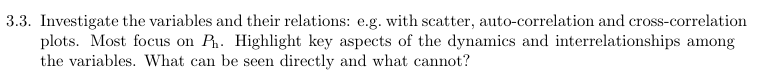

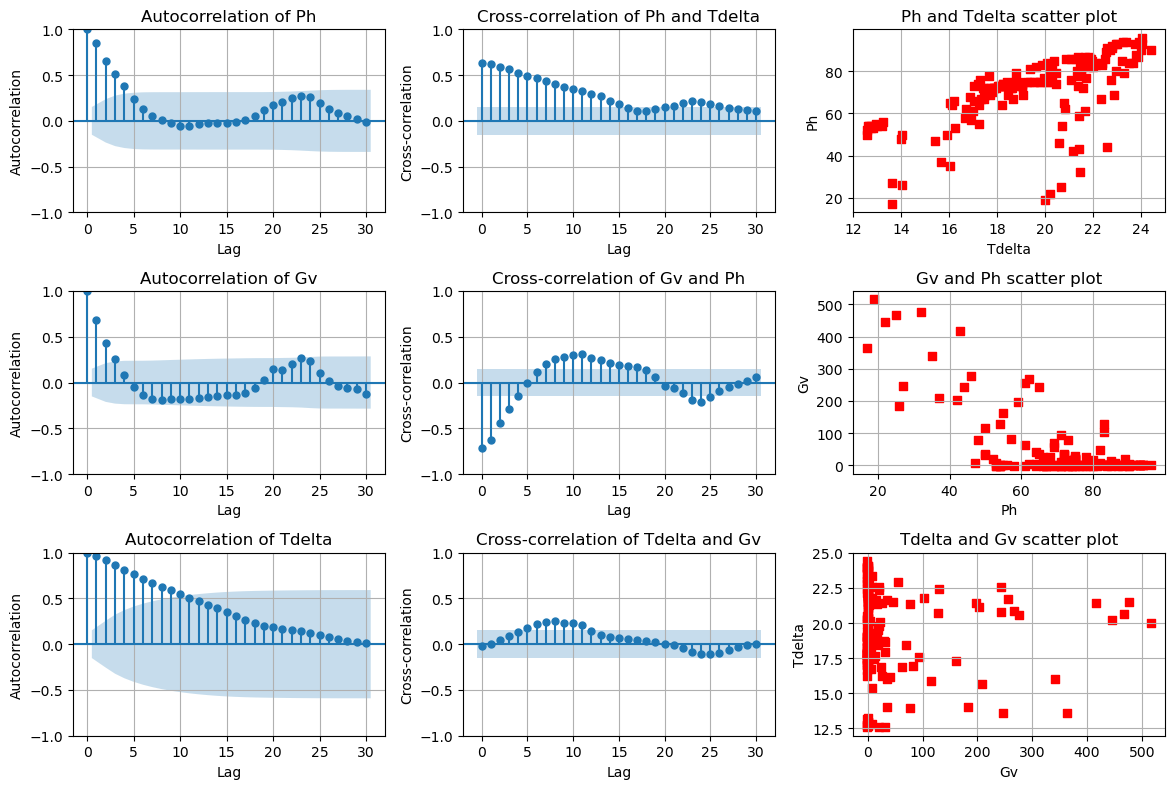

In [5]:

# Plotting Residuals, ACF and CCF
plt.figure(figsize=(12, 8))

# it was 10 before (for more clean)
#nl=np.shape(df_train)[0]-1
nl=30

plt.subplot(3, 3, 1)
plot_acf(df_train['Ph'], lags=nl, ax=plt.gca())
plt.title('Autocorrelation of Ph')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid()

plt.subplot(3, 3, 2)
plot_ccf(df_train['Ph'], df_train['Tdelta'], lags=nl, ax=plt.gca())
plt.title('Cross-correlation of Ph and Tdelta')
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.grid()

plt.subplot(3, 3, 3)
plt.scatter(df_train['Tdelta'], df_train['Ph'], marker='s', color='red')
plt.title('Ph and Tdelta scatter plot')
plt.xlabel('Tdelta')
plt.ylabel('Ph')
plt.grid()

plt.subplot(3, 3, 4)
plot_acf(df_train['Gv'], lags=nl, ax=plt.gca())
plt.title('Autocorrelation of Gv')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid()

plt.subplot(3, 3, 5)
plot_ccf(df_train['Ph'], df_train['Gv'], lags=nl, ax=plt.gca())
plt.title('Cross-correlation of Gv and Ph')
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.grid()

plt.subplot(3, 3, 6)
plt.scatter(df_train['Ph'], df_train['Gv'], marker='s', color='red')
plt.title('Gv and Ph scatter plot')
plt.xlabel('Ph')
plt.ylabel('Gv')
plt.grid()

plt.subplot(3, 3, 7)
plot_acf(df_train['Tdelta'], lags=nl, ax=plt.gca())
plt.title('Autocorrelation of Tdelta')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid()

plt.subplot(3, 3, 8)
plot_ccf(df_train['Tdelta'], df_train['Gv'], lags=nl, ax=plt.gca())
plt.title('Cross-correlation of Tdelta and Gv')
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.grid()

plt.subplot(3, 3, 9)
plt.scatter(df_train['Gv'], df_train['Tdelta'], marker='s', color='red')
plt.title('Tdelta and Gv scatter plot')
plt.xlabel('Gv')
plt.ylabel('Tdelta')
plt.grid()

plt.tight_layout()
plt.show()

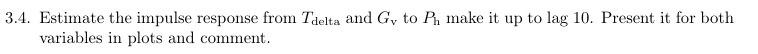

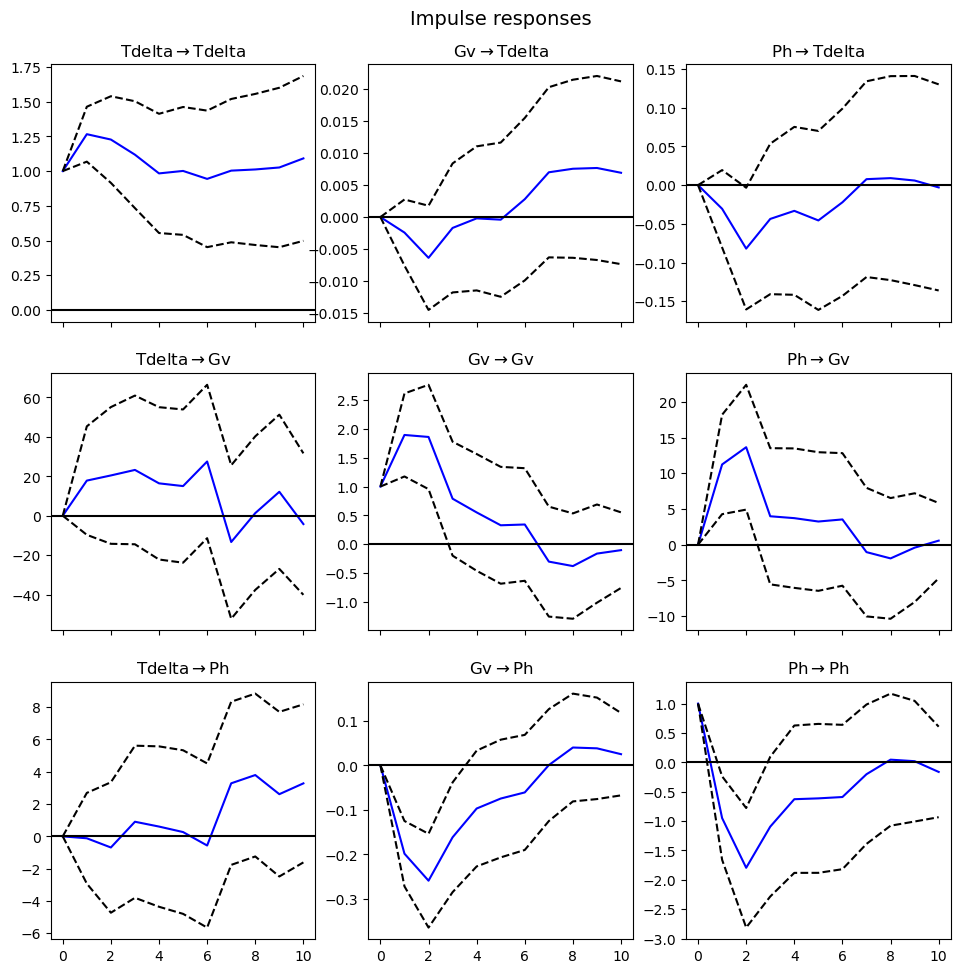

In [6]:

# Fit a VAR model
model = VAR(df_train[['Tdelta', 'Gv', 'Ph']])
results = model.fit(maxlags=10)

# Calculate impulse response up to lag 10
irf = results.irf(10)

# Plot impulse response
fig = irf.plot(orth=False)

plt.show()


In [7]:
# Standardize data and STATIONARITY check

# Create scalers
standard_scaler = StandardScaler()
t_standard_scaler=StandardScaler()


# Select columns to scale (excluding non-numeric columns if any)
columns_to_scale = df_train.select_dtypes(include=['float64', 'int64']).columns
columns_to_scale=list(columns_to_scale)
columns_to_scale.remove('Ph')
print(columns_to_scale)

# Standardize the dataset using StandardScaler
df_train_standardized = df_train.copy()
df_train_standardized['Ph'] = t_standard_scaler.fit_transform(df_train['Ph'].values.reshape(-1, 1))
df_train_standardized[columns_to_scale] = standard_scaler.fit_transform(df_train[columns_to_scale])

# Print the first few rows of the normalized and standardized datasets

print("\nStandardized Dataset:")
print(df_train_standardized.head())
#df_train=df_train_standardized

['thour', 'Tdelta', 'Gv', 'Ph.l0', 'Ph.l1', 'Ph.l2', 'Ph.l3', 'Ph.l4', 'Ph.l5', 'Ph.l6', 'Ph.l7', 'Ph.l8', 'Ph.l9', 'Ph.l10', 'Tdelta.l0', 'Tdelta.l1', 'Tdelta.l2', 'Tdelta.l3', 'Tdelta.l4', 'Tdelta.l5', 'Tdelta.l6', 'Tdelta.l7', 'Tdelta.l8', 'Tdelta.l9', 'Tdelta.l10', 'Gv.l0', 'Gv.l1', 'Gv.l2', 'Gv.l3', 'Gv.l4', 'Gv.l5', 'Gv.l6', 'Gv.l7', 'Gv.l8', 'Gv.l9', 'Gv.l10']

Standardized Dataset:
      thour                tdate        Ph    Tdelta        Gv     Ph.l0  \
0 -1.721710  2013-01-30 02:00:00 -0.933177 -2.047736 -0.424995 -0.949096   
1 -1.700967  2013-01-30 03:00:00 -1.057501 -2.071889 -0.431194 -1.074690   
2 -1.680223  2013-01-30 04:00:00 -0.995339 -2.143105 -0.426422 -1.011893   
3 -1.659480  2013-01-30 05:00:00 -1.057501 -2.243916 -0.424575 -1.074690   
4 -1.638736  2013-01-30 06:00:00 -1.057501 -2.264845 -0.435208 -1.074690   

      Ph.l1     Ph.l2     Ph.l3     Ph.l4  ...     Gv.l1     Gv.l2     Gv.l3  \
0 -1.000855 -0.864356 -0.854003 -0.780454  ... -0.425009 -0.424219 -0.

In [8]:
# stationarity check
# stationarity is when mean and variance are constant

ss=['thour','tdate']

k1=[]
# GO THROUGH ALL COLUMNS THAT ARE NOT STATIONARIZED
for i in df_train.columns.tolist():
    if i in ss:
        continue
    else:
        result = adfuller(df_train[i])
        #print(i)
        #print('ADF Statistic:', result[0])
        #print('p-value:', result[1])
        if result[1]>0.05:
            #print(i)
            k1.append(i)
print(k1)

df_nostat = df_train[k1]

df_stat=simple_auto_stationarize(df_nostat)

k2=[]
for i in k1:
    result = adfuller(df_stat[i])
    print(i)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1]>0.05:
        k2.append(i)
print(k2)

#df_train[k1]=df_stat

# if not ie  (p-value > 0.05), differenciate the data  perform one level of differentiation 
# or in other words, shift the time series data for lag order=1
#df_train['Tdelta'] = df_train['Tdelta'].diff().dropna()

############################
# tried trasformations with diff and log. Did not work
# I will automatic stationarizer




['Tdelta', 'Tdelta.l0', 'Tdelta.l1', 'Tdelta.l2', 'Tdelta.l3', 'Tdelta.l4', 'Tdelta.l5', 'Tdelta.l6', 'Tdelta.l7', 'Tdelta.l8', 'Tdelta.l9', 'Tdelta.l10']


c:\ProgramData\anaconda3\Lib\site-packages\stationarizer\core.py:191: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(srs, regression="ct")
c:\ProgramData\anaconda3\Lib\site-packages\stationarizer\core.py:191: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(srs, regression="ct")
c:\ProgramData\anaconda3\Lib\site-packages\stationarizer\core.py:191: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(srs, regression="ct")
c:\ProgramData\anaconda3\Lib\site-packages\stationarizer\core.py:191: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up tab

Tdelta
ADF Statistic: -9.342970425042138
p-value: 8.696603233458086e-16
Tdelta.l0
ADF Statistic: -9.342970425042138
p-value: 8.696603233458086e-16
Tdelta.l1
ADF Statistic: -9.338690818184265
p-value: 8.917748947757458e-16
Tdelta.l2
ADF Statistic: -9.353411157028473
p-value: 8.179884733776059e-16
Tdelta.l3
ADF Statistic: -9.361797873559293
p-value: 7.787206405074733e-16
Tdelta.l4
ADF Statistic: -9.403817698959685
p-value: 6.086704400787843e-16
Tdelta.l5
ADF Statistic: -9.330125787346294
p-value: 9.377424489453276e-16
Tdelta.l6
ADF Statistic: -9.300349935283176
p-value: 1.1168433539498701e-15
Tdelta.l7
ADF Statistic: -9.183435779680027
p-value: 2.2200888935097017e-15
Tdelta.l8
ADF Statistic: -8.485533299199812
p-value: 1.3565564770537318e-13
Tdelta.l9
ADF Statistic: -8.391451463947016
p-value: 2.360589149195196e-13
Tdelta.l10
ADF Statistic: -8.427851409922134
p-value: 1.9053082975687614e-13
[]


In [9]:
# clean df_train again

# Check for NaN values
print("NaN values in df_train:")
print(df_train.isna().sum())

# Check for infinite values
print("\nInfinite values in df_train:")
print((df_train == np.inf).sum() + (df_train == -np.inf).sum())

# Replace nan values with median
#df_train[k1] = df_train[k1].fillna(df_train[k1].median())


NaN values in df_train:
thour         0
tdate         0
Ph            0
Tdelta        0
Gv            0
Ph.l0         0
Ph.l1         0
Ph.l2         0
Ph.l3         0
Ph.l4         0
Ph.l5         0
Ph.l6         0
Ph.l7         0
Ph.l8         0
Ph.l9         0
Ph.l10        0
Tdelta.l0     0
Tdelta.l1     0
Tdelta.l2     0
Tdelta.l3     0
Tdelta.l4     0
Tdelta.l5     0
Tdelta.l6     0
Tdelta.l7     0
Tdelta.l8     0
Tdelta.l9     0
Tdelta.l10    0
Gv.l0         0
Gv.l1         0
Gv.l2         0
Gv.l3         0
Gv.l4         0
Gv.l5         0
Gv.l6         0
Gv.l7         0
Gv.l8         0
Gv.l9         0
Gv.l10        0
dtype: int64

Infinite values in df_train:
thour         0
tdate         0
Ph            0
Tdelta        0
Gv            0
Ph.l0         0
Ph.l1         0
Ph.l2         0
Ph.l3         0
Ph.l4         0
Ph.l5         0
Ph.l6         0
Ph.l7         0
Ph.l8         0
Ph.l9         0
Ph.l10        0
Tdelta.l0     0
Tdelta.l1     0
Tdelta.l2     0
Tdelta.l3     0
Tdelt

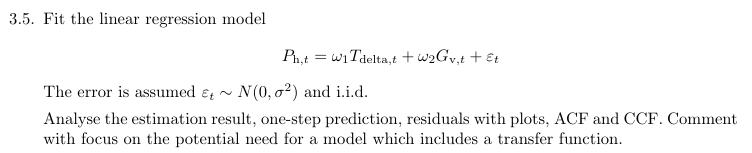

(167, 3)
(167,)
                            OLS Regression Results                            
Dep. Variable:                     Ph   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     722.6
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           4.73e-82
Time:                        20:48:01   Log-Likelihood:                -510.21
No. Observations:                 167   AIC:                             1026.
Df Residuals:                     164   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1484      2.642    

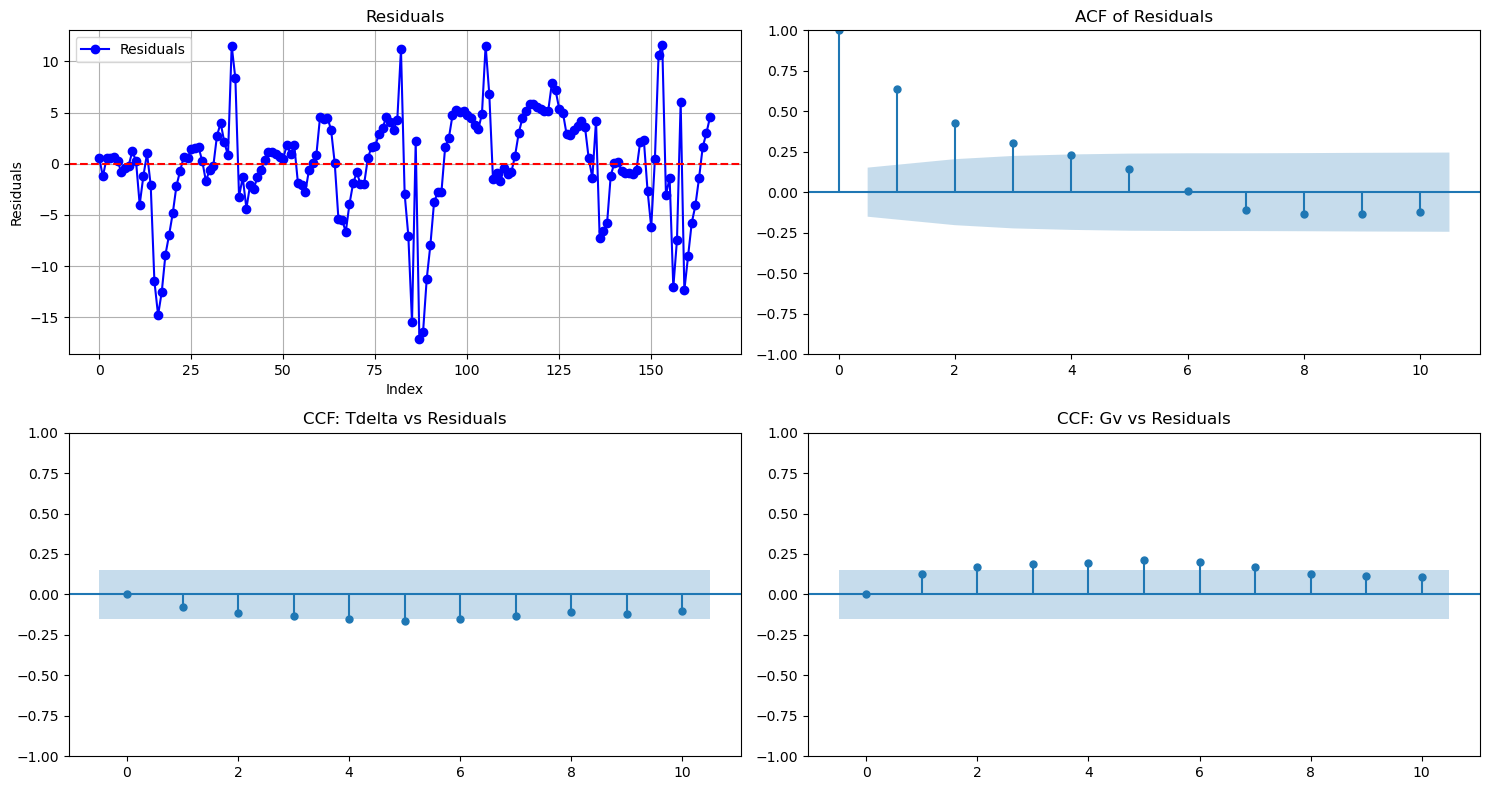

In [10]:

# Fit linear regression model
df35 = df_train[["Tdelta", "Gv"]]  # Independent variables
ydf35 = df_train["Ph"]  # Dependent variable
df35 = sm.add_constant(df35)  # Add constant for intercept
print(np.shape(df35))
print(np.shape(ydf35))
model = sm.OLS(ydf35, df35).fit()

# Analyze model results
print(model.summary())

# One-step prediction
df35["Predicted_Ph"] = model.predict(df35)

# Residuals
df35["Residuals"] = ydf35 - df35["Predicted_Ph"]

'''
# all dataset pred
df35["Predicted_all"] = model.predict(df[["Tdelta", "Gv"]])

# test predictions
df35["Predicted_test"] = model.predict(df_test[["Tdelta", "Gv"]])

'''

# Plotting Residuals, ACF and CCF
plt.figure(figsize=(15, 8))

# Residuals plot
plt.subplot(2, 2, 1)
plt.plot(df35.index, df35["Residuals"], marker="o", color="blue", label="Residuals")
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals")
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.legend()
plt.grid()

# ACF (Autocorrelation Function) of residuals
plt.subplot(2, 2, 2)
plot_acf(df35["Residuals"], lags=10, ax=plt.gca())
plt.title("ACF of Residuals")

# CCF (Cross-Correlation Function) between `Tdelta` and residuals
plt.subplot(2, 2, 3)
plot_ccf(df35["Tdelta"], df35["Residuals"], lags=10, ax=plt.gca())
plt.title("CCF: Tdelta vs Residuals")

# CCF between `Gv` and residuals
plt.subplot(2, 2, 4)
plot_ccf(df35["Gv"], df35["Residuals"], lags=10, ax=plt.gca())
plt.title("CCF: Gv vs Residuals")

plt.tight_layout()
plt.show()

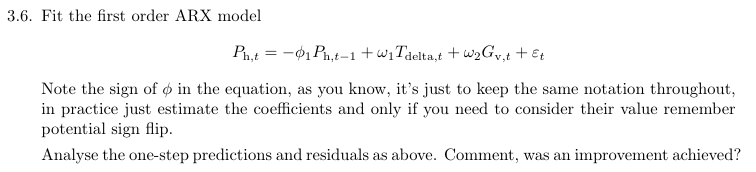

                            AutoReg Model Results                             
Dep. Variable:                     Ph   No. Observations:                  167
Model:                   AutoReg-X(0)   Log Likelihood                -393.314
Method:               Conditional MLE   S.D. of innovations              2.550
Date:                Mon, 21 Apr 2025   AIC                            796.627
Time:                        20:48:02   BIC                            812.217
Sample:                             0   HQIC                           802.955
                                  167                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3654      1.325      4.049      0.000       2.768       7.963
Ph.l1          0.4046      0.018     22.587      0.000       0.370       0.440
Tdelta         2.0960      0.086     24.393      0.0

C:\Users\georg\AppData\Local\Temp\ipykernel_23952\367042026.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df36['Ph_pred'] = result.predict(exog=df36)
C:\Users\georg\AppData\Local\Temp\ipykernel_23952\367042026.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df36['Residuals'] = ydf36 - df36['Ph_pred']


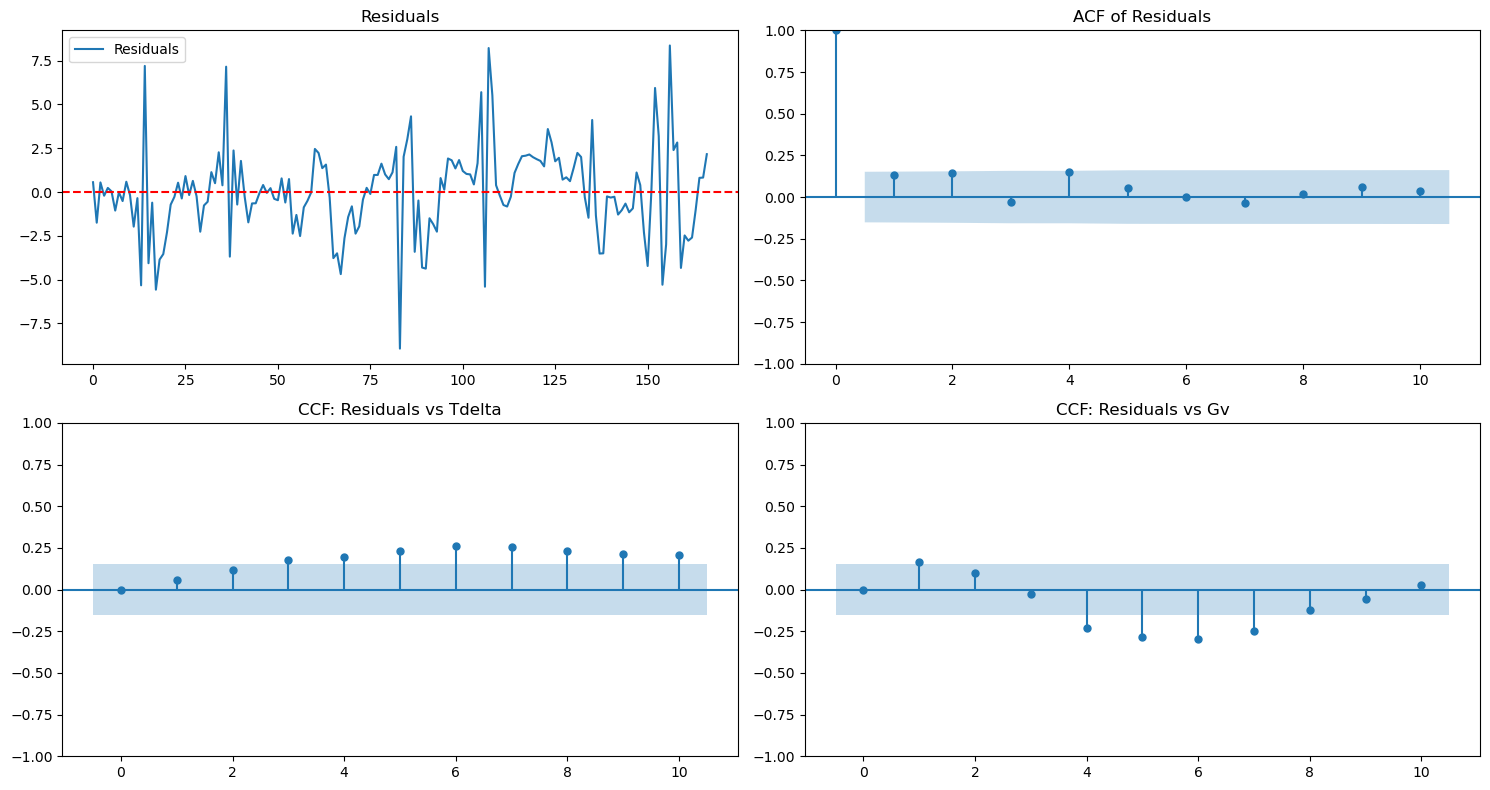

In [11]:

df36=df_train[['Ph.l1', 'Tdelta', 'Gv']]
#df36 = sm.add_constant(df36)  # Add constant for intercept NO NEED EXOG GOT IT 

# Fit ARX model: Ph_t = -phi_1 * Ph_t-1 + omega_1 * Tdelta_t + omega_2 * Gv_t
ydf36 = df_train['Ph']  # Target variable

#model = ARIMA(ydf36, exog=df36, order=(1, 0, 0))  # ARX model
model=ARX(ydf36, lags=0, exog=df36,seasonal=False)
result = model.fit()

# Print results summary
print(result.summary())

# One-step predictions
df36['Ph_pred'] = result.predict(exog=df36)

#print(df36)

# Residual analysis
df36['Residuals'] = ydf36 - df36['Ph_pred']

# Plotting Residuals, ACF and CCF
plt.figure(figsize=(15, 8))

# Plot residuals
plt.subplot(2, 2, 1)
#plt.figure(figsize=(12, 6))
plt.plot(df36.index, df36['Residuals'], label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals')
plt.legend()
#plt.show()

# Autocorrelation of residuals
plt.subplot(2, 2, 2)
plot_acf(df36['Residuals'], lags=10, ax=plt.gca())
plt.title('ACF of Residuals')
#plt.show()

# Cross-correlation: Residuals vs Tdelta and Gv
plt.subplot(2, 2, 3)
plot_ccf(df36['Residuals'], df36['Tdelta'], lags=10, ax=plt.gca())
plt.title('CCF: Residuals vs Tdelta')
#plt.show()

plt.subplot(2, 2, 4)
plot_ccf(df36['Residuals'], df36['Gv'], lags=10, ax=plt.gca())
plt.title('CCF: Residuals vs Gv')
#plt.show()

plt.tight_layout()
plt.show()


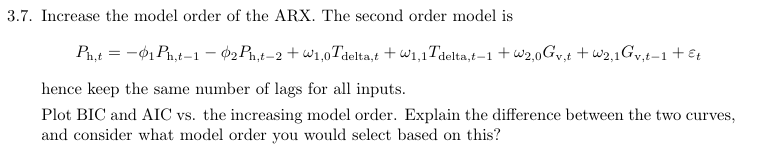

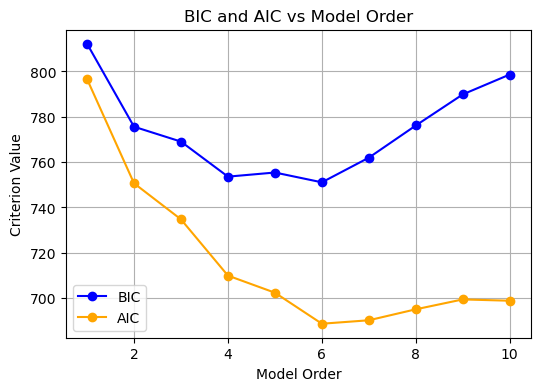

In [52]:
t=df_train.columns.tolist()

# Function to calculate BIC and AIC for ARX models with increasing order
def calculate_criteria(max_order):
    bic_values = []
    aic_values = []
    orders = list(range(1, max_order + 1))

    t=df_train.columns.tolist()

    y = df_train['Ph']

    for i in range(10):
        
        h=t[6:7+i]+['Tdelta']+t[17:17+i]+['Gv']+t[28:28+i]
        X=df_train[h]

        try:
            # Fit ARX model (ARIMA with order=(order, 0, 0))
            model=ARX(y, lags=0, exog=X,seasonal=False)
            #model = ARIMA(y, exog=X, order=(order, 0, 0))
            result = model.fit()

            #print(result.predict(exog=X))

            # Collect BIC and AIC values
            bic_values.append(result.bic)
            aic_values.append(result.aic)
        except:
            print(f"Failed to fit model for order: {i+1}")
            bic_values.append(np.nan)
            aic_values.append(np.nan)

    return orders, bic_values, aic_values

# Parameters
max_order = 10

# Calculate BIC and AIC
orders, bic_values, aic_values = calculate_criteria(max_order)

# Plot BIC and AIC versus model order
plt.figure(figsize=(6, 4))
plt.plot(orders, bic_values, marker='o', label='BIC', color='blue')
plt.plot(orders, aic_values, marker='o', label='AIC', color='orange')
plt.xlabel('Model Order')
plt.ylabel('Criterion Value')
plt.title('BIC and AIC vs Model Order')
plt.legend()
plt.grid(True)
plt.show()


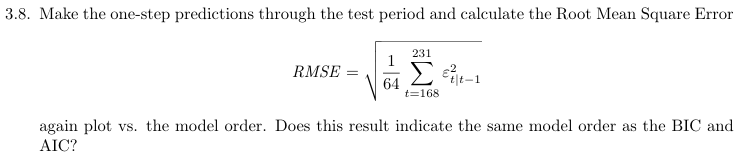

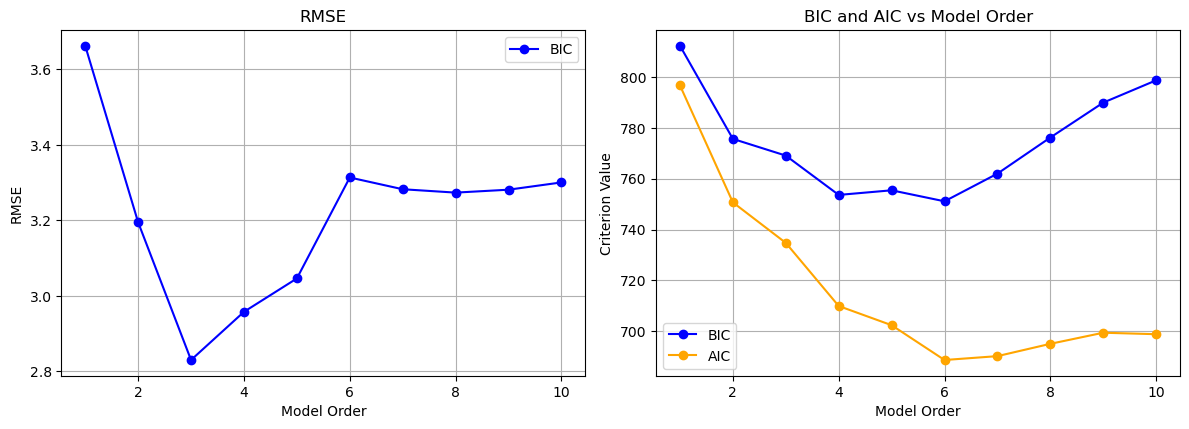

In [53]:

# Function to calculate BIC and AIC for ARX models with increasing order
def calculate_criteria(max_order):
    bic_values = []
    aic_values = []
    orders = list(range(1, max_order + 1))
    rmse=[]

    #X = df_train[['Ph.l1','Ph.l2','Tdelta','Tdelta.l1', 'Gv','Gv.l1']]  # Adjust lags as needed
    y = df_train['Ph']

    #X_test = df_test[['Ph.l1','Ph.l2','Tdelta','Tdelta.l1', 'Gv','Gv.l1']]  # Adjust lags as needed
    y_test = df_test['Ph']

    for i in range(10):

        h=t[6:7+i]+['Tdelta']+t[17:17+i]+['Gv']+t[28:28+i]
        
        X=df_train[h]
        X_test=df_test[h]
        
        # Fit ARX model (ARIMA with order=(order, 0, 0))
        model=ARX(y, lags=0, exog=X,seasonal=False)
        #model = ARIMA(y, exog=X, order=(order, 0, 0))
        result = model.fit()

        # Predict using the combined exog variable
        testpreds=result.predict(start=len(X), end=len(X) + len(X_test) - 1, exog_oos=X_test)
        #testpreds=result.predict(X_test)
        #confidence_intervals = forecast.conf_int()

        #print(np.shape(y_test))
        #print(np.shape(testpreds))
        res=np.array(y_test)-np.array(testpreds)
        #print(res[0])
        res=res**2
        #print(res[0])
        rmse.append((1/8)*(np.sum(res))**0.5)

        # Collect BIC and AIC values
        bic_values.append(result.bic)
        aic_values.append(result.aic)

    return orders, bic_values, aic_values,rmse

# Parameters
max_order = 10

# Calculate BIC and AIC
orders, bic_values, aic_values,rmse = calculate_criteria(max_order)

#print(rmse)

plt.figure(figsize=(12, 8))

# Plot BIC and AIC versus model order
#plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.plot(orders, rmse, marker='o', label='BIC', color='blue')
plt.xlabel('Model Order')
plt.ylabel('RMSE')
plt.title('RMSE')
plt.legend()
plt.grid(True)
#plt.show()

# Plot BIC and AIC versus model order
plt.subplot(2, 2, 2)
plt.plot(orders, bic_values, marker='o', label='BIC', color='blue')
plt.plot(orders, aic_values, marker='o', label='AIC', color='orange')
plt.xlabel('Model Order')
plt.ylabel('Criterion Value')
plt.title('BIC and AIC vs Model Order')
plt.legend()
plt.grid(True)
#plt.show()

plt.tight_layout()
plt.show()


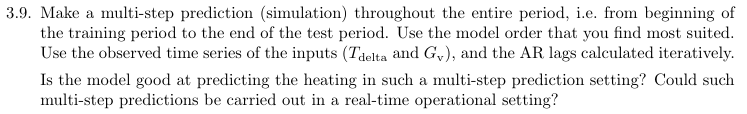

In [54]:

y = df_train['Ph']
y_test = df_test['Ph']

v=6 # based on rmse

preds=[]
tpreds=[]

for i in [0,1,5]:

    h=t[6:7+i]+['Tdelta']+t[17:17+i]+['Gv']+t[28:28+i]
        
    X=df_train[h]
    X_test=df_test[h]

    #X = df_train[i]  # Adjust lags as needed
    #print(X.head())
    #X_test=df_test[i]
    #print(X_test.head())

    #model = ARIMA(y, exog=X, order=(v, 0, 0))
    model=ARX(y, lags=0, exog=X,seasonal=False)
    result = model.fit()
    
    trainpreds=result.predict(exog=X)
    #trainpreds=result.predict(exog=df.iloc[:split_row][i])
    #trainpreds=result.predict(start=len(X), end=len(X) + len(X_test) - 1, exog_oos=df.iloc[:split_row][i])
    #trainpreds=result.predict(exog=df.iloc[:split_row][i])
    trainpreds=np.array(trainpreds)

    #trainpreds = t_standard_scaler.inverse_transform(trainpreds.reshape(-1, 1)).ravel()

    #testpreds=result.predict(start=len(X), end=len(X) + len(X_test) - 1, exog=X_test)
    testpreds=result.predict(start=len(X), end=len(X) + len(X_test) - 1, exog_oos=X_test)

    #forecast = result.get_forecast(steps=len(X_test), exog=X_test)
    #testpreds = forecast.predicted_mean
    #confidence_intervals = forecast.conf_int()
    #print(testpreds)
    preds.append(list(trainpreds)+list(testpreds))
    tpreds.append(list(testpreds))

#print(preds)

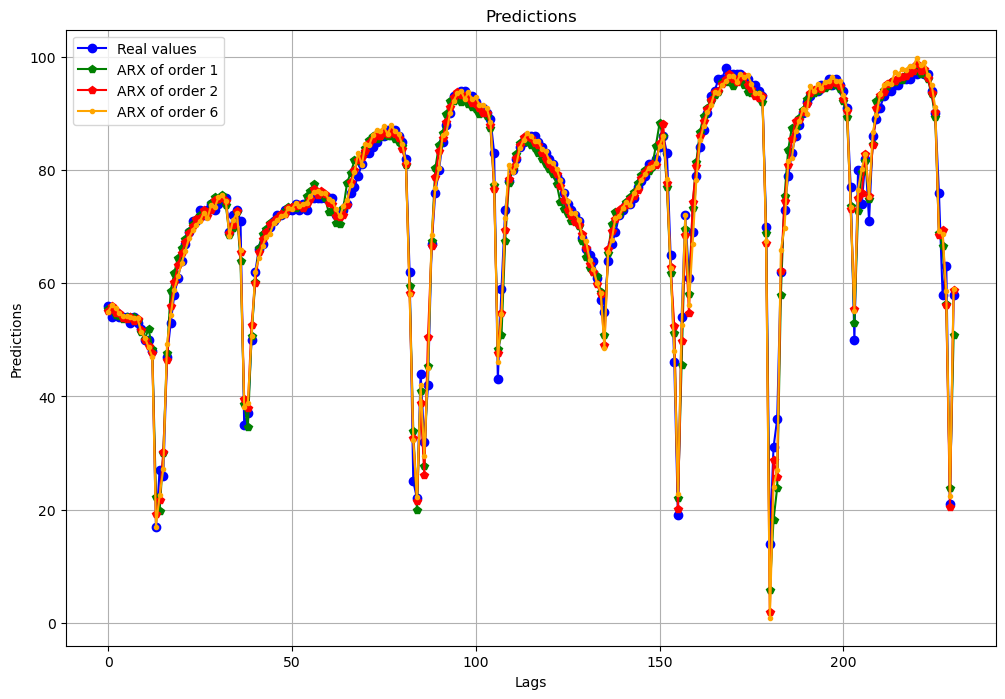

In [55]:
np.shape(preds)
np.shape(df['Ph'])

plt.figure(figsize=(12, 8))

plt.plot(df['Ph'], marker='o', label='Real values', color='blue')

#plt.plot(range(167,len(df)+1),tpreds[0], marker='s', label='First model', color='green')
#plt.plot(range(167,len(df)+1),tpreds[1], marker='s', label='Second model', color='red')
#plt.plot(range(167,len(df)+1),tpreds[2], marker='s', label='Third model', color='orange')

plt.plot(preds[0], marker='p', label='ARX of order 1', color='green')
plt.plot(preds[1], marker='p', label='ARX of order 2', color='red')
plt.plot(preds[2], marker='.', label='ARX of order 6', color='orange')

plt.xlabel('Lags')
plt.ylabel('Predictions')
plt.title('Predictions')
plt.legend()
plt.grid(True)
plt.show()
